In [1]:
# 시그모이드 함수
def sigmoid(z):
 return 1 / (1+np.exp(-z))

In [2]:
# 손실함수 크로스엔트로피 구현
def loss_func(x, t):
 delta = 1e-7 # log 무한대 발산 방지
 z = np.dot(x, W) + b
 y = sigmoid(z)
 # cross-entropy
 return -np.sum(t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ))


In [3]:
def predict(test_data):
 z = np.dot(test_data, W) + b
 y = sigmoid(z)
 if y >= 0.5:
     result = 1 # Pass
 else:
     result = 0 # Fail
 return y, result

In [4]:
def numerical_derivative(f, x):
 delta_x = 1e-4 # 0.0001
 grad = np.zeros_like(x) #수치미분된 값 저장할 ndarray로 x와 같은 크기의 0으로 된 배열 생성
 
 it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
 
 while not it.finished:
     idx = it.multi_index 
     tmp_val = x[idx]
     x[idx] = float(tmp_val) + delta_x
     fx1 = f(x) # f(x+delta_x)
 
     x[idx] = float(tmp_val) - delta_x 
     fx2 = f(x) # f(x-delta_x)
     grad[idx] = (fx1 - fx2) / (2*delta_x)
 
     x[idx] = tmp_val 
     it.iternext() # 다음 인덱스로 이동 
 
 return grad

In [5]:
def loss_val(x,t):
    y=np.dot(x,W)+b
    return (np.sum((t-y)**2))/len(x)

In [6]:
import numpy as np 
from datetime import datetime 
x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1)
t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(10,1)
W = np.random.rand(1,1)
b = np.random.rand(1)
print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)
# 수치미분을 이용한 로지스틱 회귀(Logistic Regression) 시스템 학습과정
learning_rate = 1e-2
f = lambda x : loss_func(x_data,t_data) 
print("Initial loss value = ", loss_func(x_data, t_data) )
start_time = datetime.now()
for step in range(50001):
 W -= learning_rate * numerical_derivative(f, W) 
 b -= learning_rate * numerical_derivative(f, b)
 if (step % 5000 == 0): 
     print("step = ", step, "loss value = ", loss_val(x_data, t_data))
     test_data = np.array([3.0]) # 3 시간에 대한 미래 값 예측
(real_val_1, logical_val_1) = predict(test_data)
print("시그모이드 결과 =>", real_val_1, ", 로지스틱회귀 결과 =>", logical_val_1)
test_data = np.array([17.0]) # 17 시간에 대한 미래 값 예측
(real_val_2, logical_val_2) = predict(test_data)
print("시그모이드 결과 =>", real_val_2, ", 로지스틱회귀 결과 =>", logical_val_2)

x_data.shape =  (10, 1) , t_data.shape =  (10, 1)
W =  [[0.86047143]] , W.shape =  (1, 1) , b =  [0.00053532] , b.shape =  (1,)
Initial loss value =  36.342235751136016
step =  0 loss value =  24.43715313101809
step =  5000 loss value =  26.916914885993698
step =  10000 loss value =  45.3065131209922
step =  15000 loss value =  61.26123489058856
step =  20000 loss value =  75.82480792905861
step =  25000 loss value =  89.41297882233164
step =  30000 loss value =  102.2427255719021
step =  35000 loss value =  114.44623979470259
step =  40000 loss value =  126.11284806284206
step =  45000 loss value =  137.30754237096545
step =  50000 loss value =  148.08024686439146
시그모이드 결과 => [1.40992841e-09] , 로지스틱회귀 결과 => 0
시그모이드 결과 => [0.99974586] , 로지스틱회귀 결과 => 1


In [7]:
print(W)
print(b)

[[2.04693548]]
[-26.52053334]


In [8]:
# 유방암 데이터 불러오기
from sklearn.datasets import load_breast_cancer
import pandas as pd
dataset = load_breast_cancer()
train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=["cancer"])
# 학습데이터와 타켓 데이터를 합쳐서 하나의 데이터 프레임 생성
data = pd.concat([train, target], axis=1)
data.info() # 데이터의 기본정보 확인
# 학습용 데이터/검증용 데이터 생성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["mean radius"]],data[["cancer"]], 
random_state=42)
print(X_train)
print('-------------------------------')
print(y_train)
print('-------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
from sklearn.linear_model import LogisticRegression
# solver : 최적화에 사용핛 알고리즘 설정.
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

C:\Users\82109\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='liblinear')

In [10]:
# 모델 예측 및 평가
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print("mean radius 만으로 예측핚 결과: ", pred)
accuracy_score(y_test, pred)

mean radius 만으로 예측핚 결과:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1]


0.916083916083916

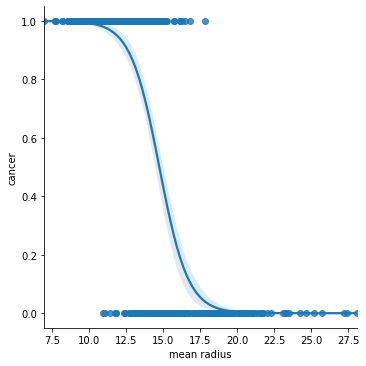

In [11]:
# 모델 그리기:mean radius 피처가 타겟을 어떻게 분류했는지 확인
# pip install statsmodels : statsmodels 설치 확인
from seaborn import lmplot
import matplotlib.pyplot as plt
lmplot(x="mean radius", y="cancer", data=data, logistic=True)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, :"cancer"], data.loc[:, "cancer"], 
random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"젂체 데이터로 예측핚 결과: {score}")

젂체 데이터로 예측핚 결과: 1.0


In [13]:
train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

LogisticRegression 파라메터
penalty - 비용 함수('l1','l2', 'elasticnet', 'none')를 지정.default='l2'
dual - Dual Formulation인지 Promal Formulation인지 결정. default=False
tol - 중지 기준에 대한 허용 오차값
C - 규칙강도의 역수값. default=1.0. 작을 수록 정규화가 강해진다.
fit_intercept - 결정 함수에 상수(bias)를 추가할지 결정. default=True
intercept_scaling - default=1
class_weight - 클래스의 가중치 설정(dict or 'balanced'). default=None
solver - 최적화에 사용할 알고리즘('newton-cg','lbfgs','liblinear', 'sag','saga').default='lbfgs'
max_iter - solver의 수렴에 걸릴 최대 반복 회수. default=100
multi_class - ovr : 이진 문제, multinomial : 다항 문제 적합. default='auto'
verbose - 로그 정보 출력
warm_start - 이전 호출에 사용했던 solution을 재사용할지 여부 결정.default=False
n_jobs - 병렬처리시 사용할 cpu코어 수
l1_ratio - default=None
random_state - 난수 시드 설정



In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, :"cancer"], data.loc[:, "cancer"], 
random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"젂체 데이터로 예측핚 결과: {score}")

젂체 데이터로 예측핚 결과: 1.0
